In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2)

In [2]:
df=pd.read_csv("Crimes_-_One_year_prior_to_present.csv")
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,02/25/2020 10:20:00 AM,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,02/25/2020 05:30:00 AM,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,02/25/2020 01:04:00 PM,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,02/25/2020 06:05:00 PM,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,02/25/2020 01:42:00 PM,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"


In [3]:
u=[]
for i in df.columns:
    u.append(i.lower().replace("  "," ").replace("#","").strip())
df.columns=u  
df.head()

,case,date of occurrence,block,iucr,primary description,secondary description,location description,arrest,domestic,beat,ward,fbi cd,x coordinate,y coordinate,latitude,longitude,location
0,JD164115,02/25/2020 10:20:00 AM,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,02/25/2020 05:30:00 AM,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,02/25/2020 01:04:00 PM,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,02/25/2020 06:05:00 PM,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,02/25/2020 01:42:00 PM,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"


In [4]:
df=df.drop(["case","iucr","fbi cd"],axis=1)

In [5]:
df.describe()

,beat,ward,x coordinate,y coordinate,latitude,longitude
count,203670.000000,203660.000000,2.023790e+05,2.023790e+05,202379.000000,202379.000000
mean,1146.964462,22.916498,1.164739e+06,1.885110e+06,41.840335,-87.671014
std,694.820705,13.722437,1.644727e+04,3.202254e+04,0.088072,0.059843
min,111.000000,1.000000,1.094587e+06,1.813897e+06,41.644590,-87.927365
25%,612.000000,10.000000,1.152724e+06,1.857812e+06,41.765114,-87.714609
50%,1023.000000,23.000000,1.166352e+06,1.890175e+06,41.854340,-87.665040
75%,1711.000000,34.000000,1.176685e+06,1.908578e+06,41.904835,-87.627413
max,2535.000000,50.000000,1.205119e+06,1.951527e+06,42.022586,-87.524545


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203670 entries, 0 to 203669
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date of occurrence     203670 non-null  object 
 1   block                  203670 non-null  object 
 2   primary description    203670 non-null  object 
 3   secondary description  203670 non-null  object 
 4   location description   202556 non-null  object 
 5   arrest                 203670 non-null  object 
 6   domestic               203670 non-null  object 
 7   beat                   203670 non-null  int64  
 8   ward                   203660 non-null  float64
 9   x coordinate           202379 non-null  float64
 10  y coordinate           202379 non-null  float64
 11  latitude               202379 non-null  float64
 12  longitude              202379 non-null  float64
 13  location               202379 non-null  object 
dtypes: float64(5), int64(1), object(8)
m

In [7]:
df["date of occurrence"]=pd.to_datetime(df["date of occurrence"],format='%m/%d/%Y %H:%M:%S %p')
df["year"]=[m.year for m in df["date of occurrence"]]
df["month"]=[m.month for m in df["date of occurrence"]]
df["day"]=[m.day for m in df["date of occurrence"]]
df['hour'] = [m.hour for m in df['date of occurrence']]


In [8]:
cat=df.select_dtypes("object").columns
num=df.select_dtypes("number").columns

In [9]:
cat

Index(['block', 'primary description', 'secondary description',
       'location description', 'arrest', 'domestic', 'location'],
      dtype='object')

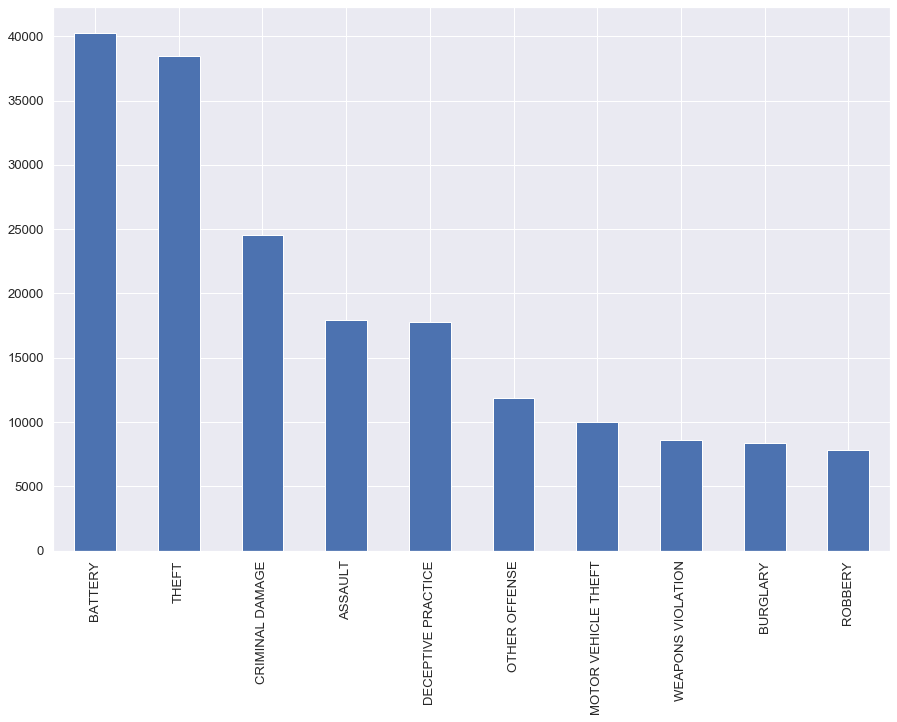

In [10]:
f=df['primary description'].value_counts().nlargest(10).plot(kind="bar")


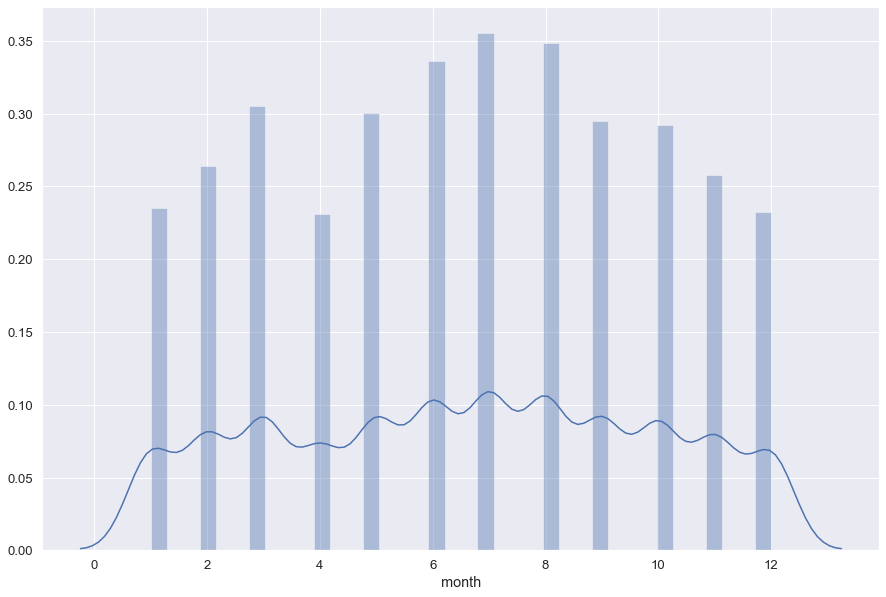

In [11]:
df_battery=df[df["primary description"]=='BATTERY']
sns.distplot(df_battery["month"])

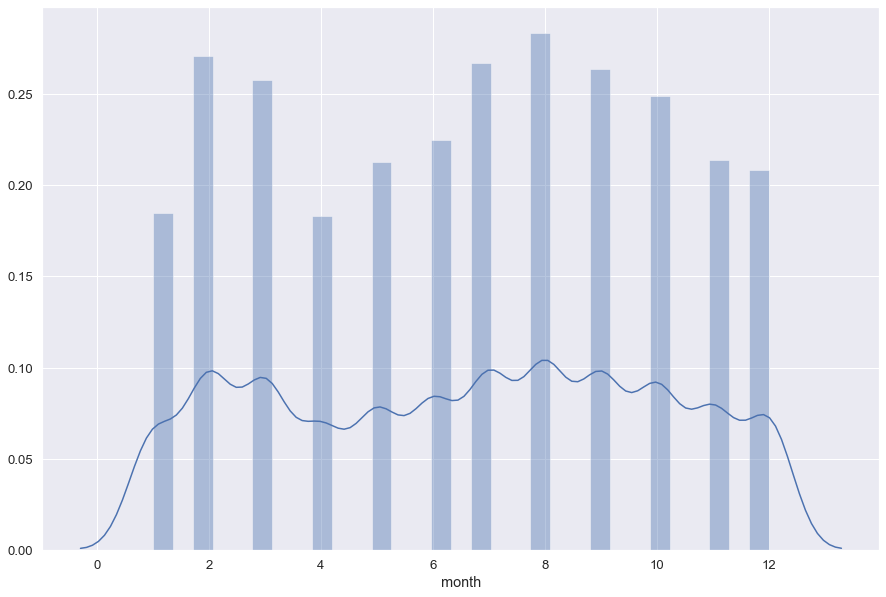

In [12]:
df_theft=df[df["primary description"]=='THEFT']
sns.distplot(df_theft["month"])

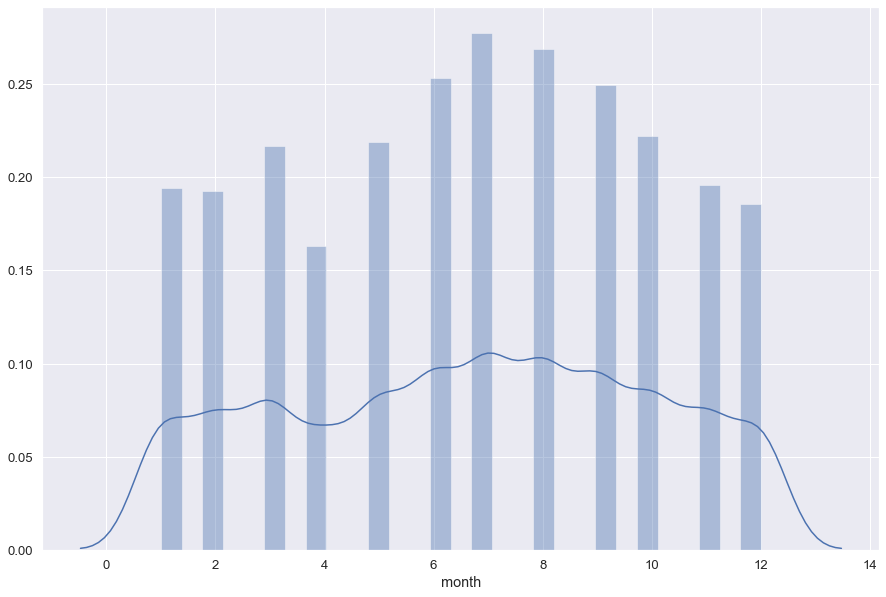

In [13]:
df_battery=df[df["primary description"]=='ASSAULT']
sns.distplot(df_battery["month"])

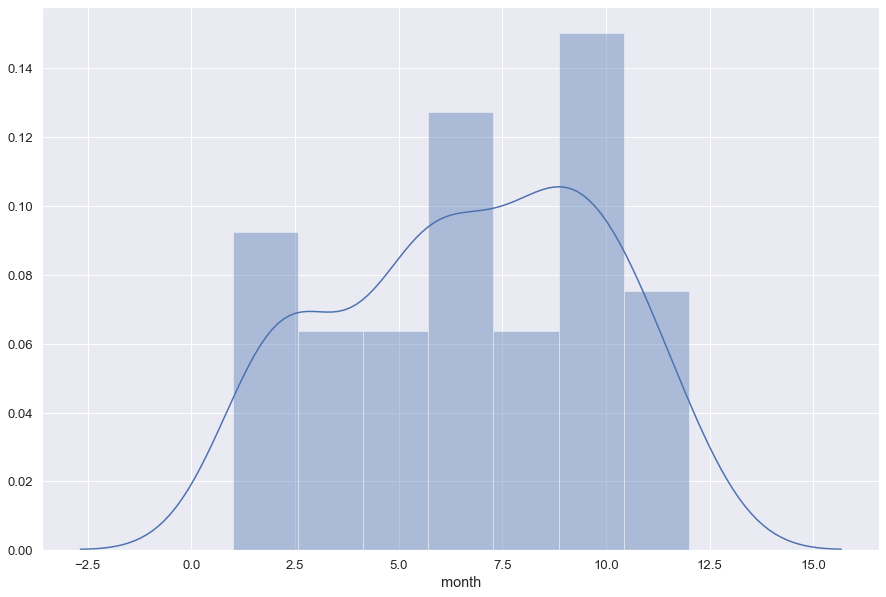

In [14]:
df_battery=df[df["primary description"]=='KIDNAPPING']
sns.distplot(df_battery["month"])

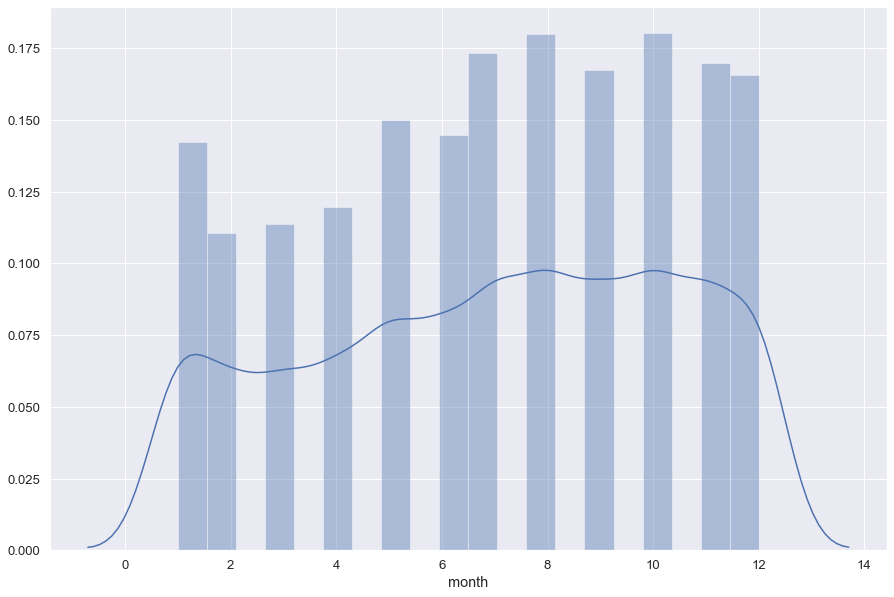

In [15]:
df_battery=df[df["primary description"]=='MOTOR VEHICLE THEFT']
sns.distplot(df_battery["month"])

In [16]:
df_theft["month"].value_counts().index

Int64Index([8, 2, 7, 9, 3, 10, 6, 11, 5, 12, 1, 4], dtype='int64')

In [17]:
#theft_in_months.fillna(0, inplace=True)
theft_in_months = pd.DataFrame({"thefts" : df_theft['month'].value_counts(), "month" : df_theft["month"].value_counts().index})
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

theft_in_months 

,thefts,month
1,2523,1
2,3696,2
3,3518,3
4,2495,4
5,2902,5
6,3063,6
7,3643,7
8,3869,8
9,3595,9
10,3394,10


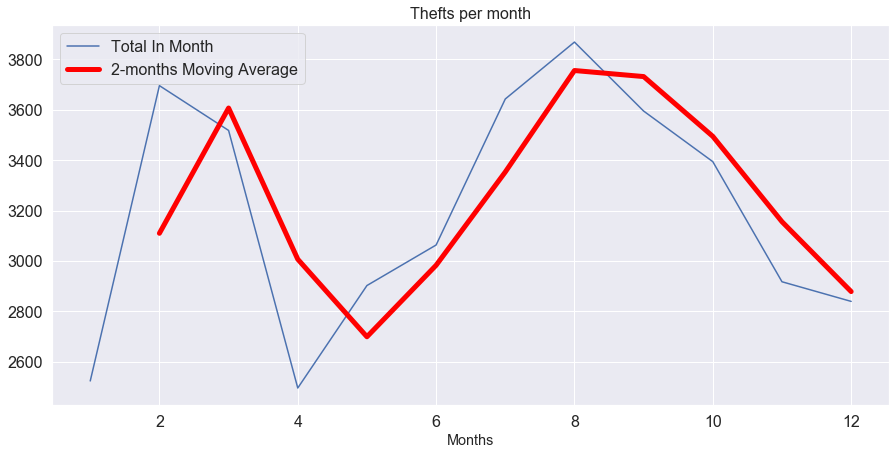

In [18]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

In [19]:
df['primary description'].value_counts()

BATTERY                              40255
THEFT                                38454
CRIMINAL DAMAGE                      24556
ASSAULT                              17950
DECEPTIVE PRACTICE                   17770
OTHER OFFENSE                        11861
MOTOR VEHICLE THEFT                   9992
WEAPONS VIOLATION                     8606
BURGLARY                              8379
ROBBERY                               7832
NARCOTICS                             6257
CRIMINAL TRESPASS                     3802
OFFENSE INVOLVING CHILDREN            1786
PUBLIC PEACE VIOLATION                1193
CRIMINAL SEXUAL ASSAULT               1052
SEX OFFENSE                            884
HOMICIDE                               800
ARSON                                  591
INTERFERENCE WITH PUBLIC OFFICER       551
PROSTITUTION                           239
STALKING                               207
INTIMIDATION                           160
CONCEALED CARRY LICENSE VIOLATION      143
LIQUOR LAW 

In [20]:
df_theft=df[df["primary description"]=='THEFT']

In [21]:
df_theft

,date of occurrence,block,primary description,secondary description,location description,arrest,domestic,beat,ward,x coordinate,y coordinate,latitude,longitude,location,year,month,day,hour
1,2020-02-25 05:30:00,033XX W CULLOM AVE,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)",2020,2,25,5
9,2020-02-25 10:30:00,080XX S KEDZIE AVE,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),N,N,834,18.0,1156448.0,1850983.0,41.746873,-87.702312,"(41.746873101, -87.702312419)",2020,2,25,10
10,2020-02-19 12:15:00,031XX W BELMONT AVE,THEFT,$500 AND UNDER,CTA BUS,N,N,1733,33.0,NaN,NaN,NaN,NaN,NaN,2020,2,19,12
16,2020-02-25 02:15:00,049XX S CALUMET AVE,THEFT,OVER $500,STREET,N,N,224,3.0,1179265.0,1872440.0,41.805264,-87.618051,"(41.805263702, -87.618051298)",2020,2,25,2
20,2020-02-25 12:00:00,015XX W HENDERSON ST,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,N,N,1922,44.0,1165458.0,1922321.0,41.942445,-87.667270,"(41.942445475, -87.667269986)",2020,2,25,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203625,2020-09-05 07:15:00,003XX N PEORIA,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,1214,27.0,1170345.0,1902686.0,41.888460,-87.649883,"(41.888460386, -87.649883236)",2020,9,5,7
203647,2020-10-28 12:45:00,024XX W 51ST ST,THEFT,RETAIL THEFT,CONVENIENCE STORE,N,N,923,14.0,1161020.0,1870793.0,41.801141,-87.685012,"(41.801141301, -87.685012091)",2020,10,28,12
203653,2020-10-21 06:30:00,051XX W MONTANA ST,THEFT,$500 AND UNDER,RESIDENCE - GARAGE,N,N,2521,31.0,1141732.0,1915820.0,41.925079,-87.754636,"(41.925078859, -87.754635929)",2020,10,21,6
203663,2020-12-04 11:20:00,009XX E 48TH ST,THEFT,OVER $500,STREET,N,N,222,4.0,1183327.0,1873382.0,41.807755,-87.603124,"(41.807754893, -87.603124371)",2020,12,4,11


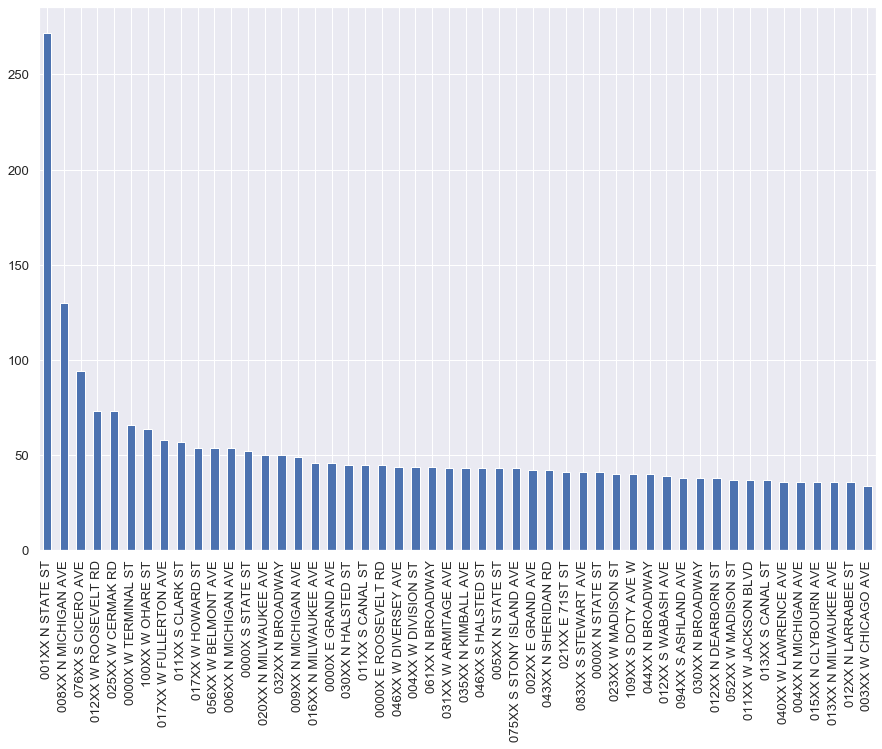

In [22]:
df_theft['block'].value_counts().nlargest(50).plot(kind="bar")

## chicago__map


In [23]:
import folium
from folium import plugins



In [25]:
locations = df.groupby('ward').first()
new_locations = locations.loc[:, ['latitude', 'longitude', 'primary description', 'arrest']]
new_locations.head(20)
new_locations[new_locations["arrest"]=="Y"]

,latitude,longitude,primary description,arrest
ward,,,,
6.0,41.737751,-87.604856,CRIMINAL TRESPASS,Y
11.0,41.864494,-87.639158,BATTERY,Y
12.0,41.843989,-87.705025,CRIMINAL TRESPASS,Y
16.0,41.780108,-87.684887,OTHER OFFENSE,Y
22.0,41.848475,-87.724676,CRIMINAL TRESPASS,Y
26.0,41.899188,-87.707210,BATTERY,Y
27.0,41.909240,-87.652748,THEFT,Y
37.0,41.901353,-87.725041,NARCOTICS,Y
41.0,41.992586,-87.798591,CRIMINAL DAMAGE,Y


In [37]:
df2=pd.read_csv("Police_Stations.csv")
df2.head()

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"
1,18,Near North,1160 N Larrabee St,Chicago,IL,60610,http://home.chicagopolice.org/community/distri...,312-742-5870,312-742-5771,312-742-5773,1172080.029,1908086.527,41.903242,-87.643352,"(41.9032416531, -87.6433521393)"
2,19,Town Hall,850 W Addison St,Chicago,IL,60613,http://home.chicagopolice.org/community/distri...,312-744-8320,312-744-4481,312-744-8011,1169730.744,1924160.317,41.947400,-87.651512,"(41.9474004564, -87.651512018)"
3,20,Lincoln,5400 N Lincoln Ave,Chicago,IL,60625,http://home.chicagopolice.org/community/distri...,312-742-8714,312-742-8803,312-742-8841,1158399.146,1935788.826,41.979550,-87.692845,"(41.9795495131, -87.6928445094)"
4,22,Morgan Park,1900 W Monterey Ave,Chicago,IL,60643,http://home.chicagopolice.org/community/distri...,312-745-0710,312-745-0814,312-745-0569,1165825.476,1830851.333,41.691435,-87.668520,"(41.6914347795, -87.6685203937)"


In [64]:
df2=df2[["LATITUDE","LONGITUDE","DISTRICT NAME"]]

In [65]:
df2

,LATITUDE,LONGITUDE,DISTRICT NAME
0,41.830702,-87.623395,Headquarters
1,41.903242,-87.643352,Near North
2,41.947400,-87.651512,Town Hall
3,41.979550,-87.692845,Lincoln
4,41.691435,-87.668520,Morgan Park
5,41.999763,-87.671324,Rogers Park
6,41.918609,-87.765574,Grand Central
7,41.858373,-87.627356,Central
8,41.801811,-87.630560,Wentworth
9,41.766431,-87.605748,Grand Crossing


In [96]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11)

In [97]:
for i in range(len(df2)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}"""
    popup_text = popup_text.format(new_locations.index[i])
    folium.CircleMarker(location = [lat, long], popup= popup_text,color="black",radius=.1,fill = True).add_to(chicago_map)


In [98]:
for i in range(len(new_locations[new_locations["arrest"]=="N"])):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,color="red",fill = True).add_to(chicago_map)
for i in range(len(new_locations[new_locations["arrest"]=="Y"])):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,color="blue",fill = True).add_to(chicago_map)


In [99]:
chicago_map

As we can see the red area with no black points is the most needed area for new police station.